In [1]:
# RNN 循环神经网络(Recurrent Neural Network)
import torch
import math
import matplotlib.pyplot as plt
import numpy

EPOCH = 1500
left,right = -2, 2
PI = math.pi
NUM = 50
# x, y 是普通sinx 的torch tensor
x = torch.tensor([(num * PI) for num in numpy.arange(left,right,(right-left)/NUM)], dtype = torch.float32 )
input_x = x.reshape(-1, 1)
y = torch.sin(x)

In [2]:
class MLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(1,20)
        self.layer2 = torch.nn.Linear(20,20)
        self.layer3 = torch.nn.Linear(20,1)
    def forward(self, x):
        x = self.layer1(x)
        x = torch.nn.functional.relu(x)
        x=self.layer2(x)
        x=torch.nn.functional.relu(x)
        x=self.layer3(x)
        return  x
    
class RecNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn=torch.nn.LSTM(input_size=1,hidden_size=2,num_layers=1,batch_first=True)
        #至于这个线性层为什么是2维度接收，要看最后网络输出的维度是否匹配label的维度
        self.linear=torch.nn.Linear(2,1)
        
    def forward(self,x):
        # print("x shape: {}".format(x.shape))
        # x [batch_size, seq_len, input_size]
        output,hn=self.rnn(x)
        # print("output shape: {}".format(output.shape))
        # out [seq_len, batch_size, hidden_size]
        x=output.reshape(-1,2)
	
        # print("after change shape: {}".format(x.shape))
        x=self.linear(x)

        # print("after linear shape: {}".format(x.shape))

        return x

In [3]:
mlp=MLP()
mlp=torch.load('mlp.pt')
rnn=RecNN()
rnn=torch.load('rnn.pt')

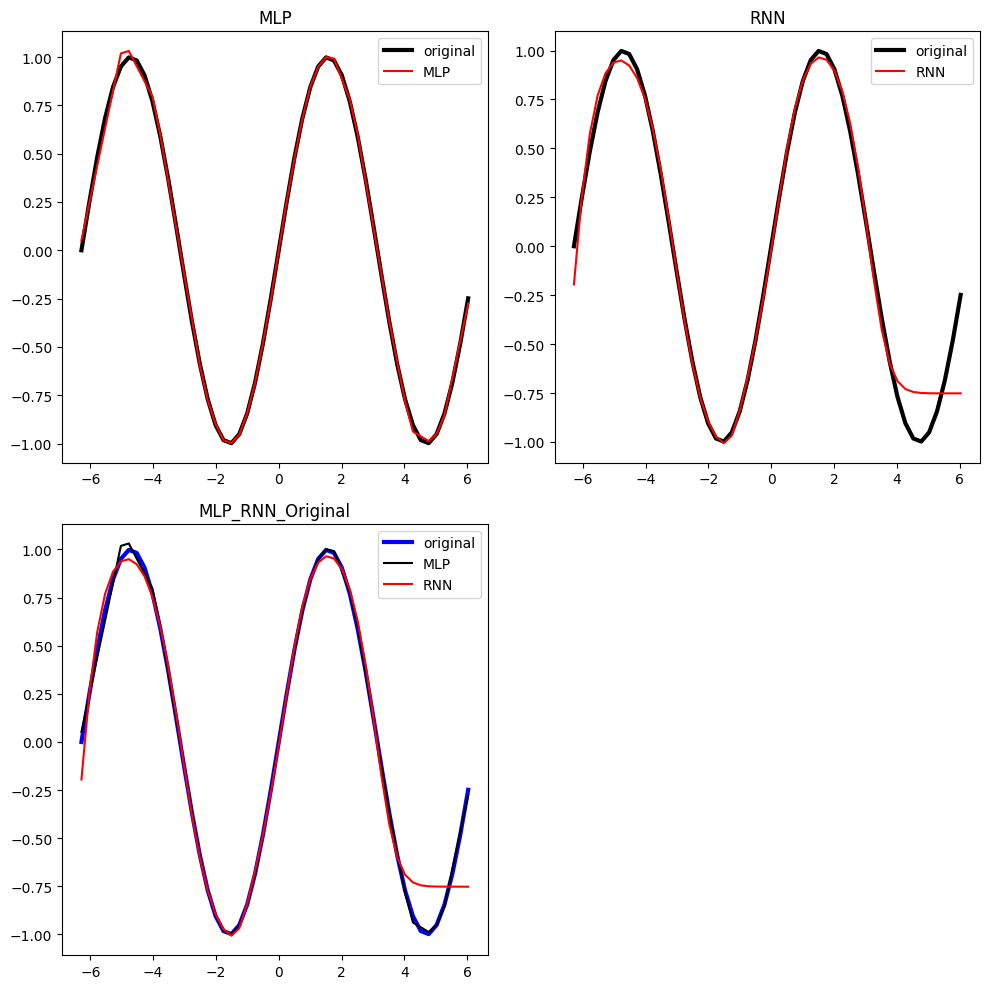

In [4]:
def PlotCurve(mlp, rnn, input_x, x):
    # input_x 是输入网络的x。
    # sin_x 是列表，x的取值，一维数据、
    # 虽然他们的内容（不是维度）是一样的。可以print shape看一下。
    mlp_eval = mlp.eval()
    rnn_eval = rnn.eval()
    # mlp_y_np=[]
    # rnn_y_np=[]
    mlp_y = mlp_eval(input_x)
    # for i in range(mlp_y):
    #     mlp_y_np.append(i.detach().numpy())
    rnn_y = rnn_eval(input_x.unsqueeze(0))
    # for i in range(rnn_y):
    #     rnn_y_np.append(i.detach().numpy())
    mlp_y_np=mlp_y.cpu().detach().numpy()
    rnn_y_np=rnn_y.cpu().detach().numpy()

    plt.figure(figsize=(10, 10))

    plt.subplot(221)
    plt.plot(x, torch.sin(x), label="original", linewidth=3,color='black')
    plt.plot(x, [y[0] for y in mlp_y_np], label='MLP',color='red')
    plt.title('MLP')
    plt.legend()

    plt.subplot(222)
    plt.plot(x, torch.sin(x), label="original", linewidth=3,color='black')
    plt.plot(x, [y[0] for y in rnn_y_np], label='RNN',color='red')
    plt.title('RNN')
    plt.legend()
    
    plt.subplot(223)
    plt.plot(x, torch.sin(x), label="original", linewidth=3,color='blue')
    plt.plot(x, [y[0] for y in mlp_y_np], label='MLP',color='black')
    plt.plot(x, [y[0] for y in rnn_y_np], label='RNN',color='red')
    plt.title('MLP_RNN_Original')
    plt.legend()

    plt.tight_layout()
    plt.show()

PlotCurve(mlp, rnn, input_x, x)